# Calcolo numerico - Esercitazione 5

## 1. Calcolo zero funzione
Scrivere una `function` che implementi il metodo delle approssimazioni successive per il calcolo dello zero di una funzione $f(x)$ prendendo come input una delle seguenti funzioni per l'aggiornamnto:
* $g(x)=x-f(x)e^{x/2}$
* $g(x)=x-f(x)e^{-x/2}$
Testare la `function` per trovare lo zero della funzione $f(x)=e^x-x^2$, la cui soluzione è $x^*=-0.703467$.

fTrue =  8.035078391532835e-07
Metodo approssimazioni successive g1 
 x = -0.7034674224983917 
 iter_new= 100


IndexError: index 101 is out of bounds for axis 0 with size 101

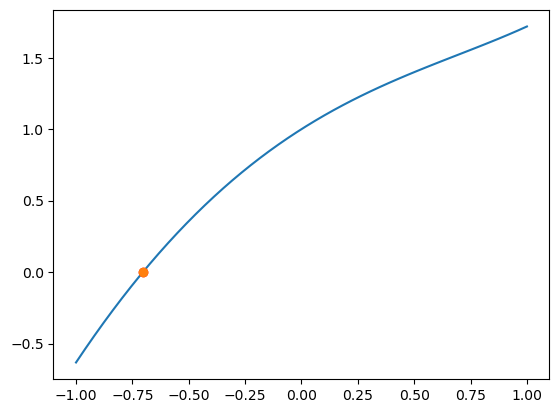

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Exercise 1
# Function approssimazioni successive
def succ_app(f, g, tolf, tolx, maxit, xTrue, x0=0):
  i=0
  err=np.zeros(maxit+1, dtype=np.float64)
  err[0]=tolx+1
  vecErrore=np.zeros(maxit+1, dtype=np.float64)
  vecErrore[0] = np.abs(xTrue - x0)
  x=x0

  while (i<maxit or (np.abs(f(x))>tolf) or err[i]>tolx): # scarto assoluto tra iterati
    x_new= g(x)
    err[i+1]= np.abs(x_new - x)
    vecErrore[i+1]= np.abs(xTrue - x_new)
    i=i+1
    x=x_new
  err=err[0:i]
  vecErrore = vecErrore[0:i]
  return (x, i, err, vecErrore) 

def newton(f, df, tolf, tolx, maxit, xTrue, x0=0):
    g = lambda x: x - f(x) / df(x)
    (x, i, err, vecErrore) = succ_app(f, g, tolf, tolx, maxit, xTrue, x0)
    return (x, i, err, vecErrore)

f = lambda x: np.exp(x)-x**2
df = lambda x: np.exp(x) - 2 * x
g1 = lambda x: x-f(x)*np.exp(x/2)
g2 = lambda x: x-f(x)*np.exp(-x/2)

xTrue = -0.703467
fTrue = f(xTrue)
print('fTrue = ', fTrue)


xplot = np.linspace(-1, 1)
fplot = f(xplot)

plt.plot(xplot,fplot)
plt.plot(xTrue,fTrue, 'or', label='True')

tolx= 10**(-10)
tolf = 10**(-6)
maxit=100
x0= 0

[sol_g1, iter_g1, err_g1, vecErrore_g1]=succ_app(f, g1, tolf, tolx, maxit, xTrue, x0)
print('Metodo approssimazioni successive g1 \n x =',sol_g1,'\n iter_new=', iter_g1)

plt.plot(sol_g1,f(sol_g1), 'o', label='g1')

[sol_g2, iter_g2, err_g2, vecErrore_g2]=succ_app(f, g2, tolf, tolx, maxit, xTrue, x0)
print('Metodo approssimazioni successive g2 \n x =',sol_g2,'\n iter_new=', iter_g2)

plt.plot(sol_g2,f(sol_g2), 'og', label='g2')

[sol_newton, iter_newton, err_newton, vecErrore_newton]=newton(f, df, tolf, tolx, maxit, xTrue, x0)
print('Metodo Newton \n x =',sol_newton,'\n iter_new=', iter_newton)

plt.plot(sol_newton,f(sol_newton), 'ob', label='Newton')
plt.legend()
plt.grid()
plt.show()

# GRAFICO Errore vs Iterazioni

# g1
plt.plot(vecErrore_g1, '.-', color='blue')
# g2
plt.plot(vecErrore_g2[:20], '.-', color='green')
# Newton
plt.plot(vecErrore_newton, '.-', color='red')

plt.legend( ("g1", "g2", "newton"))
plt.xlabel('iter')
plt.ylabel('errore')
plt.title('Errore vs Iterazioni')
plt.grid()
plt.show()